In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

In [23]:
# Display the first few rows of the dataset
titani.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
#Number of Row and Column
titanic.shape

(891, 15)

In [25]:
# Basic information about the dataset
titanic.info()

# Summary statistics
titanic.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# Check for missing values
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [43]:
# Fill missing values in 'Age' with the median age
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill missing values in 'Embarked' with the most common value
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Fill missing values in 'Embark_town' with the most common value
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

# Drop the 'Deck' column
titanic.drop(columns=['deck'], inplace=True)

# Verify changes
titanic.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

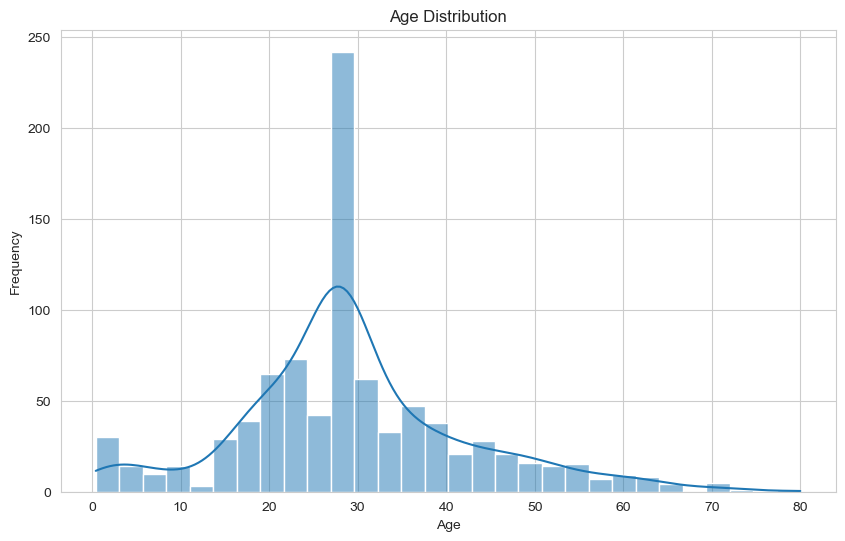

In [47]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


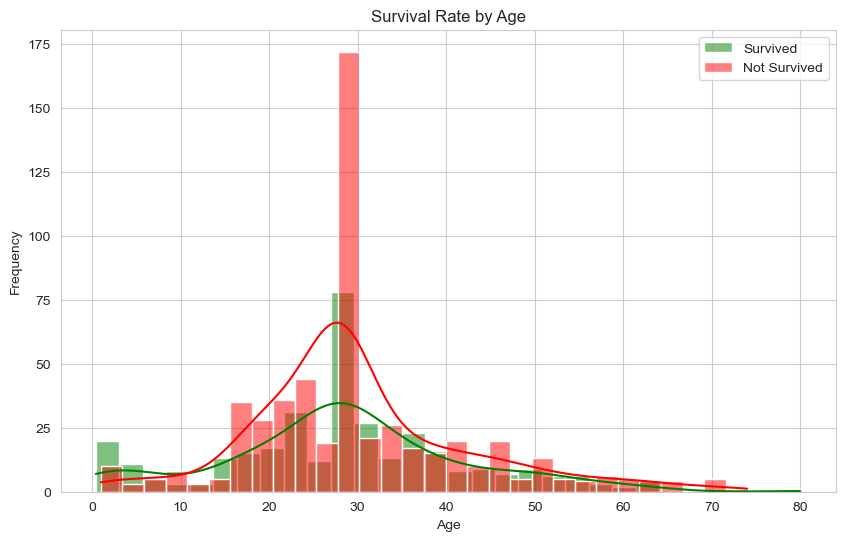

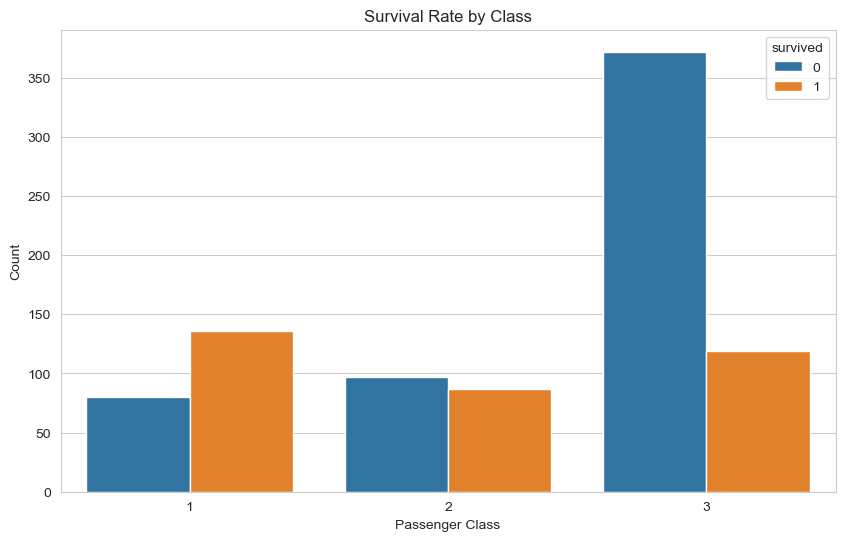

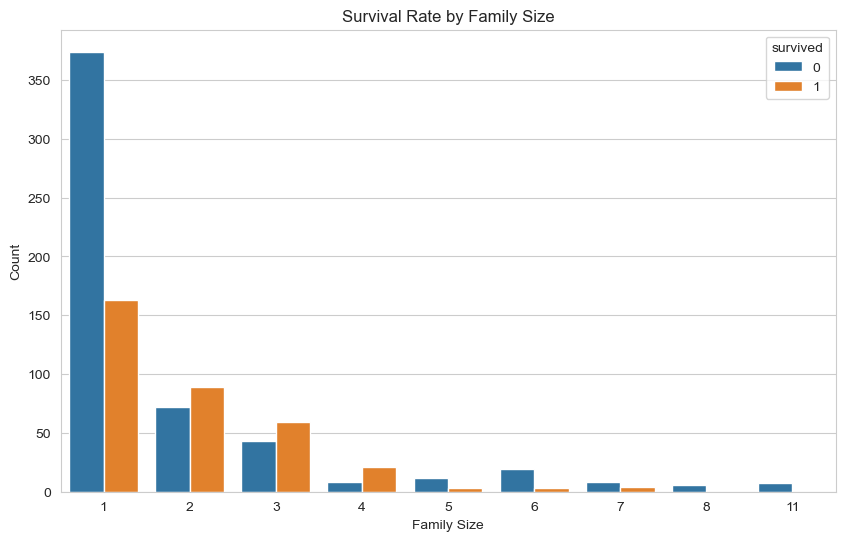

In [61]:
# Survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(titanic[titanic['survived'] == 1]['age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(titanic[titanic['survived'] == 0]['age'], bins=30, kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Survival rate by class
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Creating a family size feature
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch'] + 1

# Survival rate by family size
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


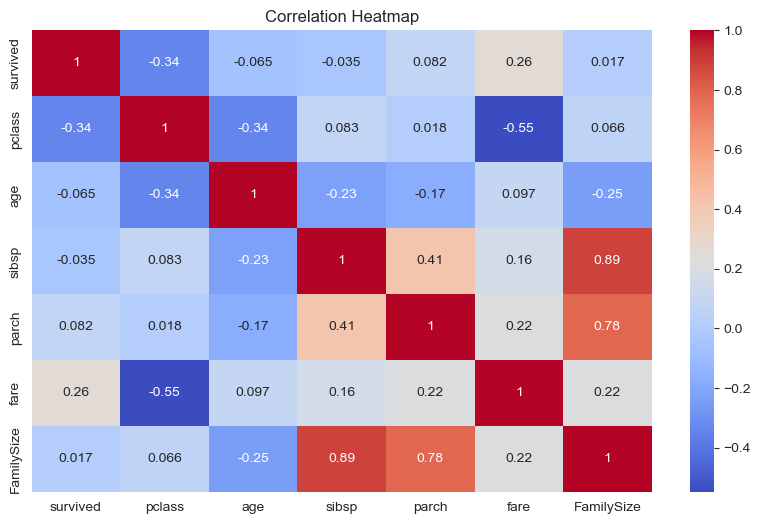

In [65]:
# Select only numeric columns
numeric_df = titanic.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [67]:
# Analyzing age, class, and family size
age_survival = titanic.groupby('age')['survived'].mean()
class_survival = titanic.groupby('pclass')['survived'].mean()
family_survival = titanic.groupby('FamilySize')['survived'].mean()

print("Survival rate by Age:\n", age_survival)
print("Survival rate by Class:\n", class_survival)
print("Survival rate by Family Size:\n", family_survival)


Survival rate by Age:
 age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: survived, Length: 88, dtype: float64
Survival rate by Class:
 pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64
Survival rate by Family Size:
 FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64


In [71]:
import os

# Define the directory and file path
directory = 'path/to'
file_path = os.path.join(directory, 'cleaned_titanic.csv')

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save cleaned data
titanic.to_csv(file_path, index=False)

print(f"Cleaned data saved to {file_path}")


Cleaned data saved to path/to\cleaned_titanic.csv
